# R Analysis of BMT303  Metagenomic Classification Data
## Matt Buckley / Bhatt Lab / December 2016

### Packages

In [1]:
install.packages("ggfortify")
install.packages("ggplot2")
install.packages("viridis")
install.packages("dplyr")
install.packages("tidyr")


The downloaded binary packages are in
	/var/folders/5m/xmsmglrs21vfbfhx2xpdg_dh0000gn/T//Rtmpb25tcO/downloaded_packages

The downloaded binary packages are in
	/var/folders/5m/xmsmglrs21vfbfhx2xpdg_dh0000gn/T//Rtmpb25tcO/downloaded_packages

The downloaded binary packages are in
	/var/folders/5m/xmsmglrs21vfbfhx2xpdg_dh0000gn/T//Rtmpb25tcO/downloaded_packages

The downloaded binary packages are in
	/var/folders/5m/xmsmglrs21vfbfhx2xpdg_dh0000gn/T//Rtmpb25tcO/downloaded_packages

The downloaded binary packages are in
	/var/folders/5m/xmsmglrs21vfbfhx2xpdg_dh0000gn/T//Rtmpb25tcO/downloaded_packages


In [ ]:
install.packages("scatterplot3d")

In [ ]:
install.packages('pca3d')
install.packages("rgl")

### Libraries

In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(RColorBrewer)
library(ggfortify)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [41]:
library(viridis)

In [3]:
#library(rgl)

In [ ]:
library(pca3d)

In [3]:
library(scatterplot3d)

In [2]:
source("http://peterhaschke.com/Code/multiplot.R")

### Read-in locally downloaded OneCodex data.

In [4]:
df_combo = read.csv("./OneCodexData/combinedFullData.csv")

## Tidy Up Dataframe

In [5]:
# Remove rows that have insignificant # of reads
c <- filter(df_combo, All.Samples > 10)
# Relabel sample columns
newNames = c("Name","Rank","Tax.ID","Type","Phylum","Class","Order","Family","Genus","Species",
             "All.Samples", "D 6","D 0","D -3", "C 21", "C 16","C 7","A 22", "B -4", "A 15","A 7",
             "A 1", "A 0", "A -4", "C 0", "C 1",  "B 1",  "B 7", "B 22")
colnames(c) <- newNames
# Put into Long Form
c2 <- gather(c, "Sample", "Reads", 11:29)
# Split Sample Column into 2 variables, Patient and Day
c3 <- separate(data = c2, col = Sample, into =  c("Patient", "Day"), sep = " ", convert = TRUE)
# Create new dataframe from part of previous
c4 <- c3 %>% filter(Name %in% c("Total Reads", "Mapped Reads"))
c5 <- c4 %>% spread(Name, Reads)
c6 <- c5[c("Patient", "Day", "Mapped Reads", "Total Reads")]
# Join together, matching by Day and Sample, adding two new variable columns
c7 <- inner_join(c3, c6)
# Remove bad rows
c8 <- c7[!(c7$Name %in% c("Total Reads", "Mapped Reads")),]
# Add columns of normalized data
c8$Mapped.Relative = as.numeric(as.character(c8$`Reads`)) / as.numeric(as.character(c8$`Mapped Reads`))
# Transform character to integer
c8$`Total Reads` <- as.numeric(as.character(c8$`Total Reads`))
c8$`Mapped Reads` <- as.numeric(as.character(c8$`Mapped Reads`))
c8$Reads <- as.numeric(as.character(c8$Reads))
c8$Mapped.Relative <- as.numeric(as.character(c8$Mapped.Relative))
c8$Day <- as.numeric(as.character(c8$Day))
# Remove low read counts
c8 <- filter(c8, "Reads" > 10)
# Remove All.samples because it's meaningless
c8 <- c8[!(c8$Patient == "All.Samples"),]

print("Data Dimensions: ")
print(dim(c8))

Warning message:
“attributes are not identical across measure variables; they will be dropped”Warning message:
“Too few values at 3597 locations: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...”Joining, by = c("Patient", "Day")


[1] "Data Dimensions: "
[1] 64710    16


### Observe Dataframe 

In [6]:
head(c8, n = 20)

,Name,Rank,Tax.ID,Type,Phylum,Class,Order,Family,Genus,Species,Patient,Day,Reads,Mapped Reads,Total Reads,Mapped.Relative
3600,Bacteria,superkingdom,2,Bacteria,,,,,,,D,6,27423000,27903934,35729900,0.9827646525
3601,Terrabacteria group,no rank,1783272,Bacteria,,,,,,,D,6,27247780,27903934,35729900,0.9764852511
3602,Firmicutes,phylum,1239,Bacteria,Firmicutes,,,,,,D,6,27075116,27903934,35729900,0.9702974498
3603,FCB group,no rank,1783270,Bacteria,,,,,,,D,6,60736,27903934,35729900,0.0021766107
3604,Bacteroidetes/Chlorobi group,no rank,68336,Bacteria,,,,,,,D,6,60730,27903934,35729900,0.0021763956
3605,Bacteroidetes,phylum,976,Bacteria,Bacteroidetes,,,,,,D,6,60730,27903934,35729900,0.0021763956
3606,Bacteroidia,class,200643,Bacteria,Bacteroidetes,Bacteroidia,,,,,D,6,59960,27903934,35729900,0.0021488010
3607,Clostridia,class,186801,Bacteria,Firmicutes,Clostridia,,,,,D,6,24149171,27903934,35729900,0.8654396545
3608,Bacteroidales,order,171549,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,,,,D,6,26645,27903934,35729900,0.0009548833
3609,Clostridiales,order,186802,Bacteria,Firmicutes,Clostridia,Clostridiales,,,,D,6,15581643,27903934,35729900,0.5584030911


## Exploratory Data Visualizations

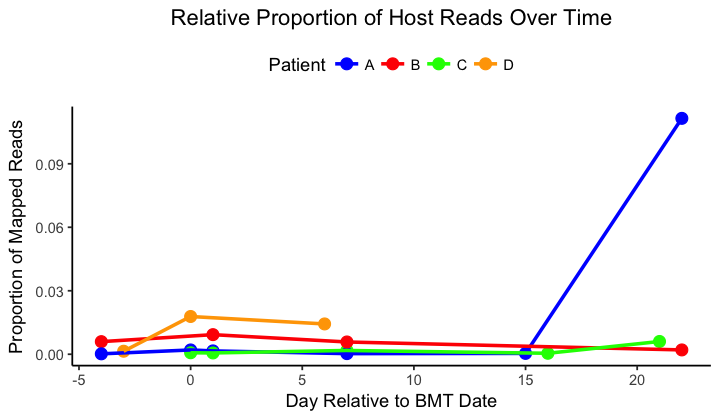

In [7]:
### GRAPH 1
# Relative Host Reads over Time
options(repr.plot.width  = 6, repr.plot.height = 3.5)
cc <- c8 %>% filter(Type == "Host")
g1 <- ggplot(data = cc, mapping = aes(x = Day, y = Mapped.Relative, color = Patient)) + 
  geom_point(cex = 3) +
  labs(y = "Proportion of Mapped Reads", title = "Host Reads") +
  #stat_smooth() +
  geom_line(cex = 1) +
  scale_color_manual(name = "Patient", labels = c("A", "B", "C", "D"),
                     values = c("blue", "red", "green", "orange")) +
  labs(y = "Proportion of Mapped Reads", x = "Day Relative to BMT Date") +
  ggtitle("Relative Proportion of Host Reads Over Time") +
  theme_classic() +
  theme(legend.position="top") +
  theme(plot.title = element_text(hjust = 0.5))
g1

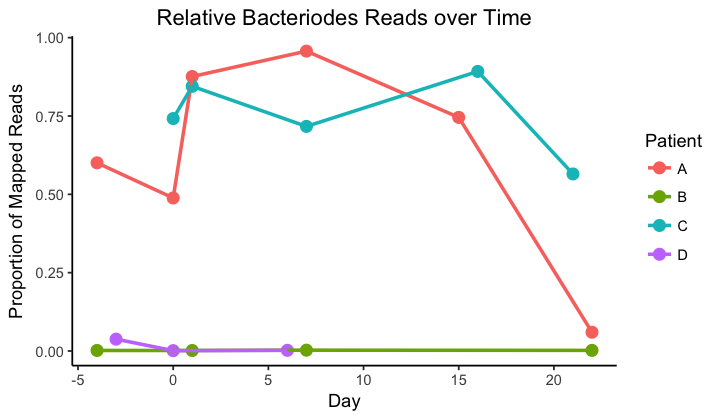

In [8]:
### GRAPH 2
# Relative Bacteriodes Reads over Time
options(repr.plot.width  = 6, repr.plot.height = 3.5)
cc1 <- c8 %>% filter(Phylum == "Bacteroidetes", Rank == "phylum")
g2 <- ggplot(data = cc1, mapping = aes(x = Day, y = Mapped.Relative,
                                       group = Patient, color = Patient)) + 
  geom_point(cex = 3) +
  geom_line(cex = 1) +
  theme_classic() +
  labs(y = "Proportion of Mapped Reads", title = "Relative Bacteriodes Reads over Time") +
  theme(plot.title = element_text(hjust = 0.5)) # centers title
g2

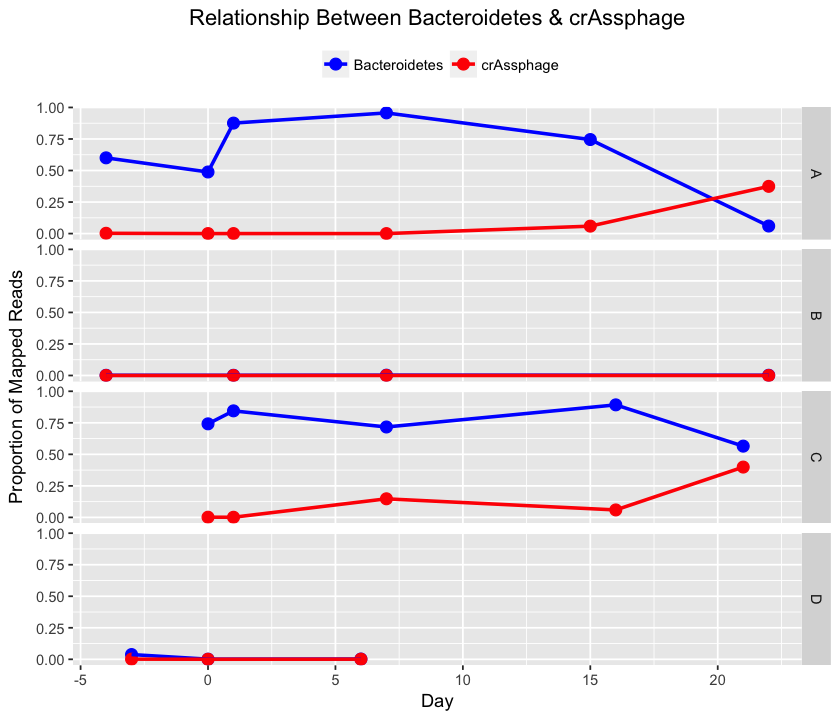

In [9]:
### GRAPH 3
# Relative Viral and Bacteriodetes Reads over Time
options(repr.plot.width  = 7, repr.plot.height = 6)
cc2 <- c8 %>% filter(Species == "Uncultured phage crAssphage" | (Phylum == "Bacteroidetes" & Rank == "phylum"))
g3 <- ggplot(data = cc2, mapping = aes(x = Day, y = Mapped.Relative, color = Type)) + 
  geom_point(cex = 3) +
  geom_line(cex = 1) +
  facet_grid(Patient~.) +
  theme(legend.position="top") +
  labs(y = "Proportion of Mapped Reads", title = "Relationship Between Bacteroidetes & crAssphage") +
  scale_color_manual(name = NULL, labels = c("Bacteroidetes", "crAssphage"), values = c("blue", "red")) +
  theme(plot.title = element_text(hjust = 0.5)) # centers title
g3

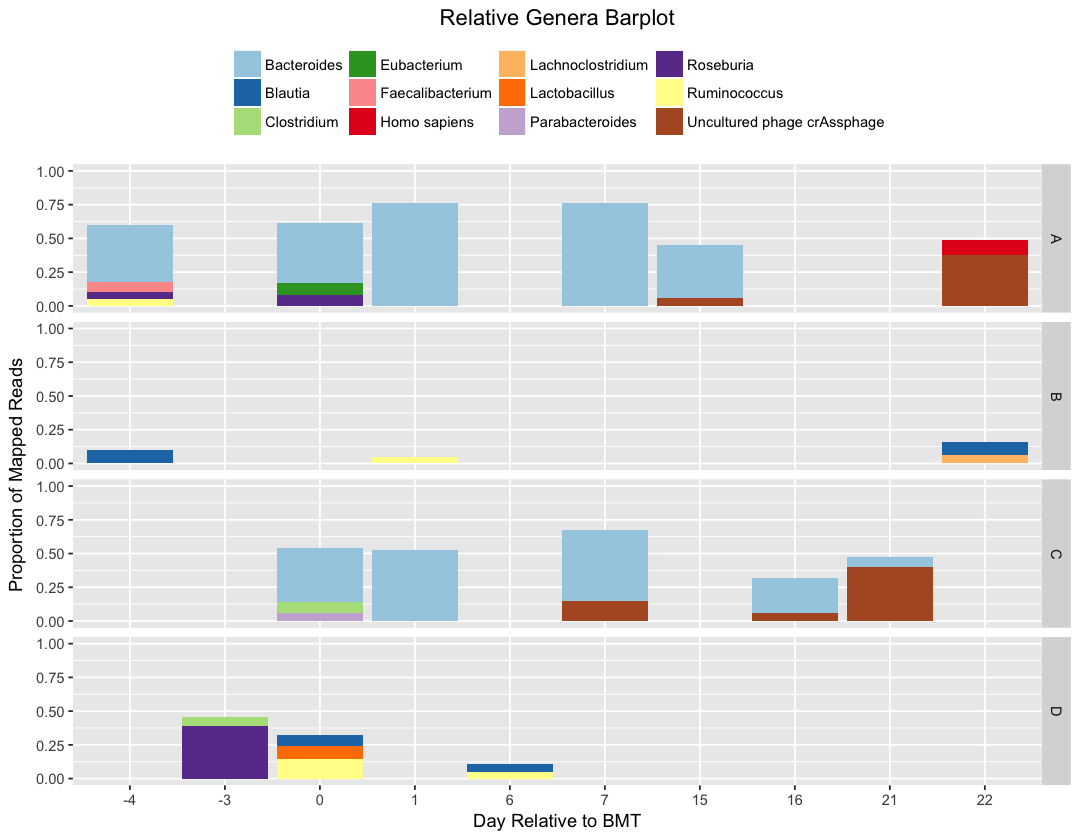

In [10]:
### GRAPH 4
# Relative Genera Reads over Time, ALL Samples
options(repr.plot.width  = 9, repr.plot.height = 7)
cc3 <- c8 %>% filter(Rank == "genus" | Type == "Host" | Species == "Uncultured phage crAssphage")
cc3 <- cc3 %>% filter(Mapped.Relative > 0.05)

g4 <- ggplot(data = cc3, mapping = aes(x = factor(Day), weight = Mapped.Relative)) +
  geom_bar(aes(fill = Name)) +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  ylim(c(0,1)) +
  facet_grid(Patient~.) +
  scale_fill_brewer(palette="Paired") +
  theme(legend.position="top") +
  theme(plot.title = element_text(hjust = 0.5)) +
  ggtitle("Relative Genera Barplot") +
  guides(fill=guide_legend(title=NULL)) 
g4

#### Note low proportion of reads mapped to the genus level. Results may be misleading. 

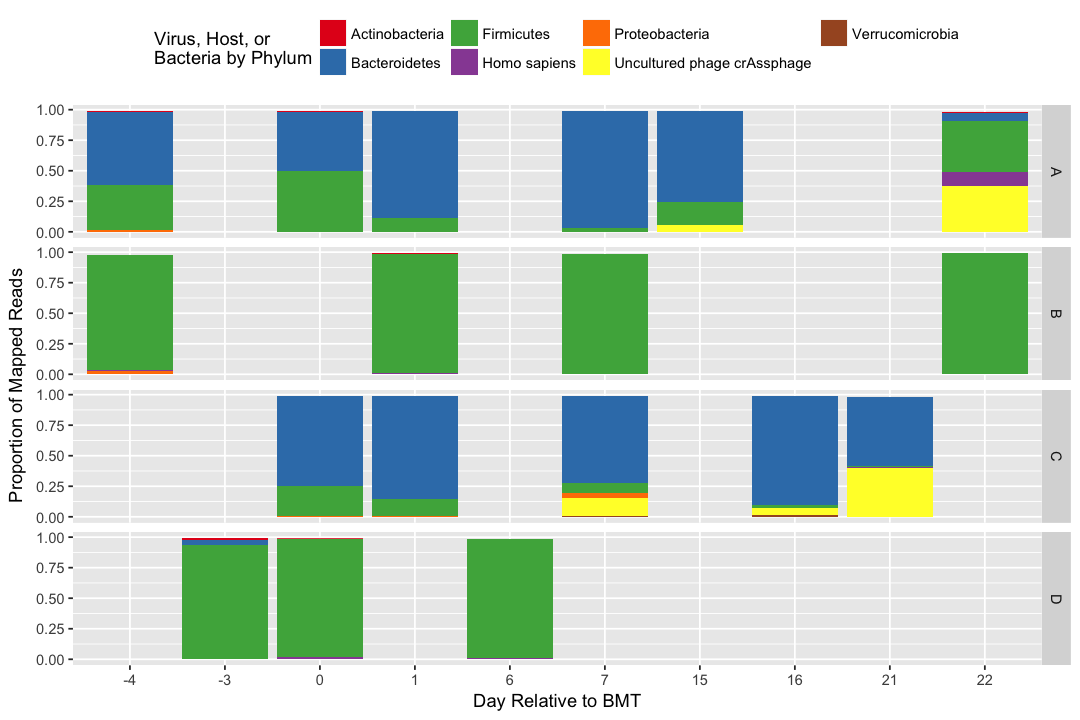

In [11]:
### GRAPH 5
# Relative Phylum Reads over Time, ALL Samples
options(repr.plot.width  = 9, repr.plot.height = 6)
cc4 <- c8 %>% filter(Rank == "phylum" | Type == "Host" | Species == "Uncultured phage crAssphage")
cc4 <- cc4 %>% filter(Mapped.Relative > 0.005)

g5 <- ggplot(data = cc4, mapping = aes(x = factor(Day), weight = Mapped.Relative)) +
  geom_bar(aes(fill = Name)) +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  facet_grid(Patient~.) +
  scale_fill_brewer(palette="Set1") +
  theme(legend.position="top") +
  guides(fill=guide_legend(title="Virus, Host, or \nBacteria by Phylum"))
g5

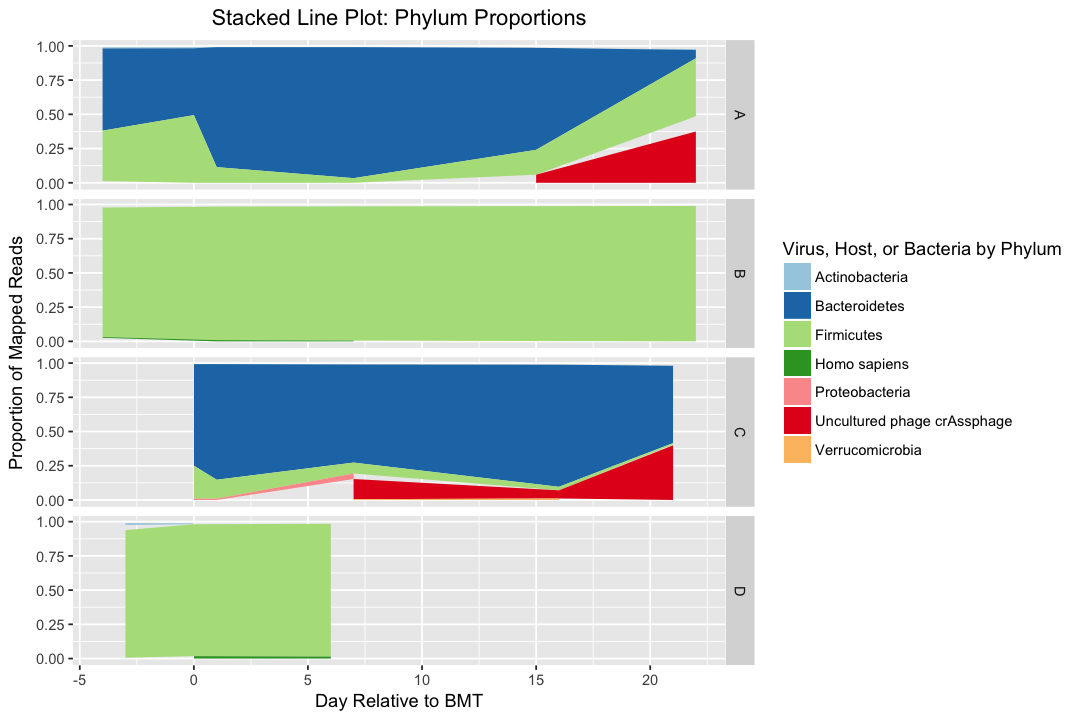

In [12]:
##################
##################
# GRAPH 5.2
# Stacked line plot: Relative Phylum Reads over Time, ALL Samples
options(repr.plot.width  = 9, repr.plot.height = 6)
g66 <- ggplot(data = cc4, mapping = aes(x = Day, y = Mapped.Relative, fill = Name)) +
  geom_area(position = 'stack') +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  facet_grid(Patient~.) +
  scale_fill_brewer(palette="Paired") +
  ggtitle("Stacked Line Plot: Phylum Proportions")+
  theme(legend.position="right") +
  theme(plot.title = element_text(hjust = 0.5)) +
  guides(fill=guide_legend(title="Virus, Host, or Bacteria by Phylum"))
g66

Loading required package: grid


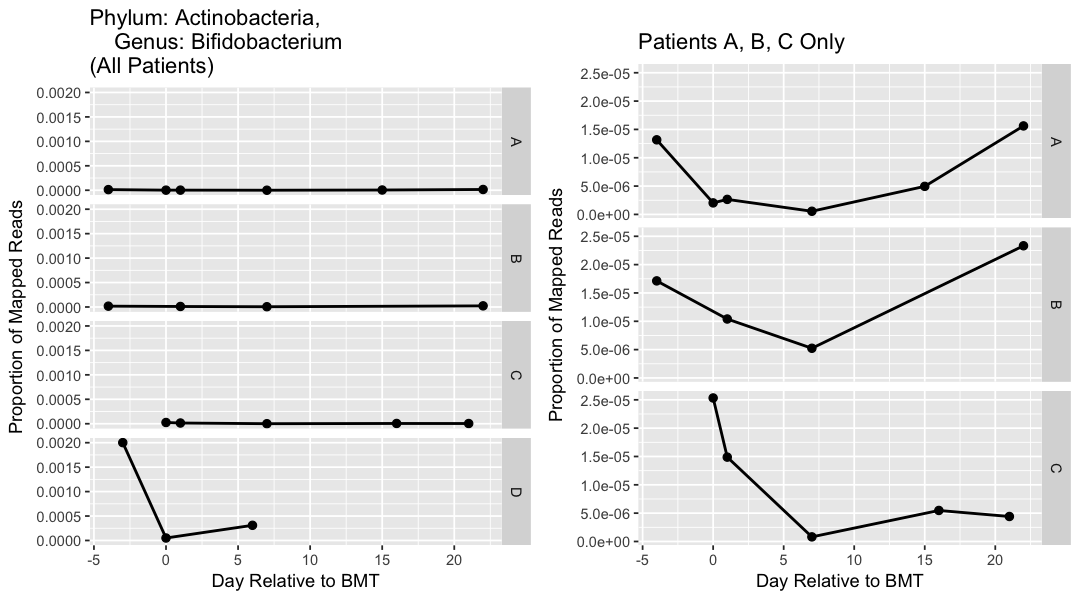

In [13]:
### GRAPH 6
# Relative Bifidobacterium Reads over Time
# Hypothesized to INCREASE Relative to Controls
options(repr.plot.width  = 9, repr.plot.height = 5)
cc5 <- c8 %>% filter(Genus == "Bifidobacterium", Rank == "genus", !(Patient == "D"))
cc6 <- c8 %>% filter(Genus == "Bifidobacterium", Rank == "genus")
g3 <- ggplot(data = cc5, mapping = aes(x = Day, y = Mapped.Relative)) +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  facet_grid(Patient~.) +
  geom_point(cex = 2) +
  geom_line(cex = .8) +
  ggtitle("\nPatients A, B, C Only") +
  theme_grey()
g4 <- ggplot(data = cc6, mapping = aes(x = Day, y = Mapped.Relative)) +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  facet_grid(Patient~.) +
  geom_point(cex = 2) +
  geom_line(cex = .8) +
  ggtitle("Phylum: Actinobacteria,\n    Genus: Bifidobacterium\n(All Patients)") +
  theme_grey()
multiplot(g4, g3, cols = 2)

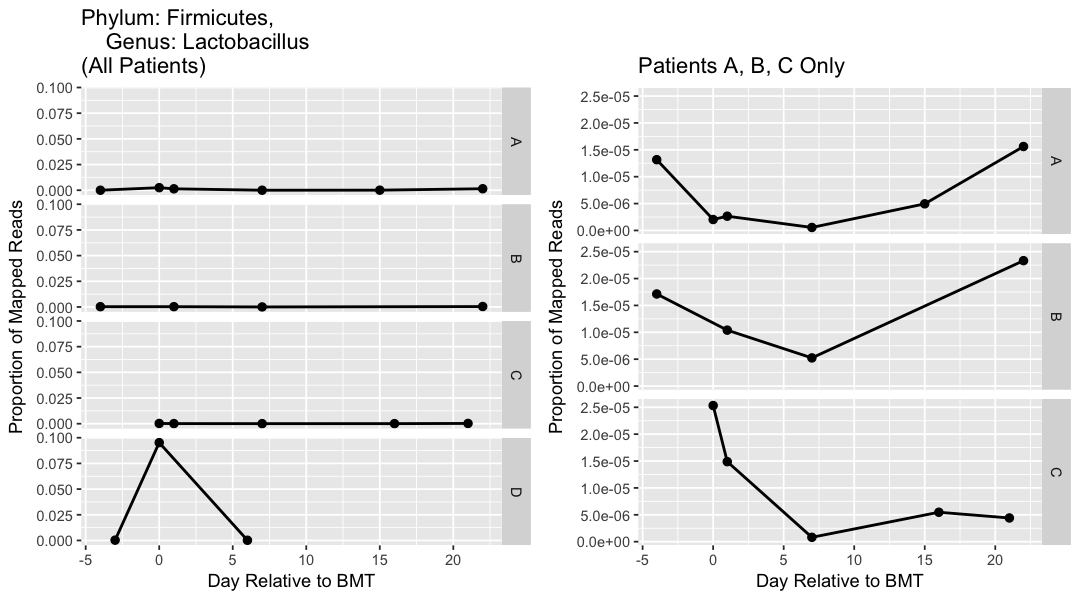

In [14]:
### GRAPH 7
# Relative Lactobacillus (genus) Reads over Time
# Hypothesized to INCREASE Relative to Controls
options(repr.plot.width  = 9, repr.plot.height = 5)
cc7 <- c8 %>% filter(Genus == "Lactobacillus", Rank == "genus")
cc8 <- c8 %>% filter(Genus == "Bifidobacterium", Rank == "genus", !(Patient == "D"))
g8 <- ggplot(data = cc7, mapping = aes(x = Day, y = Mapped.Relative)) +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  facet_grid(Patient~.) +
  geom_point(cex = 2) +
  geom_line(cex = .8) +
  ggtitle("Phylum: Firmicutes,\n    Genus: Lactobacillus\n(All Patients)") +
  theme_grey()
g9 <- ggplot(data = cc8, mapping = aes(x = Day, y = Mapped.Relative)) +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  facet_grid(Patient~.) +
  geom_point(cex = 2) +
  geom_line(cex = .8) +
  ggtitle("\n\nPatients A, B, C Only") +
  theme_grey()
multiplot(g8, g9, cols = 2)

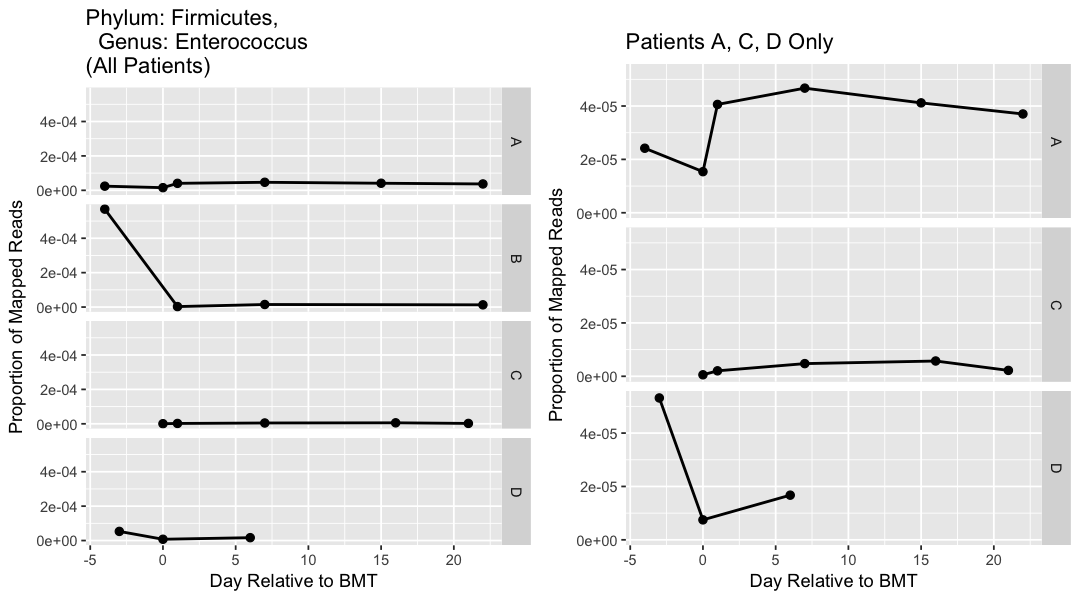

In [15]:
### GRAPH 8
# Relative Enterococcus (genus) Reads over Time
# Hypothesized to DECREASE Relative to Controls
options(repr.plot.width  = 9, repr.plot.height = 5)
d1 <- c8 %>% filter(Genus == "Enterococcus", Rank == "genus")
d2 <- c8 %>% filter(Genus == "Enterococcus", Rank == "genus", !(Patient == "B"))
g10 <- ggplot(data = d1, mapping = aes(x = Day, y = Mapped.Relative)) +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  facet_grid(Patient~.) +
  geom_point(cex = 2) +
  geom_line(cex = .8) +
  ggtitle("Phylum: Firmicutes,\n  Genus: Enterococcus\n(All Patients)")
g11 <- ggplot(data = d2, mapping = aes(x = Day, y = Mapped.Relative)) +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  facet_grid(Patient~.) +
  geom_point(cex = 2) +
  geom_line(cex = .8) +
  ggtitle("\nPatients A, C, D Only")
multiplot(g10, g11, cols = 2)

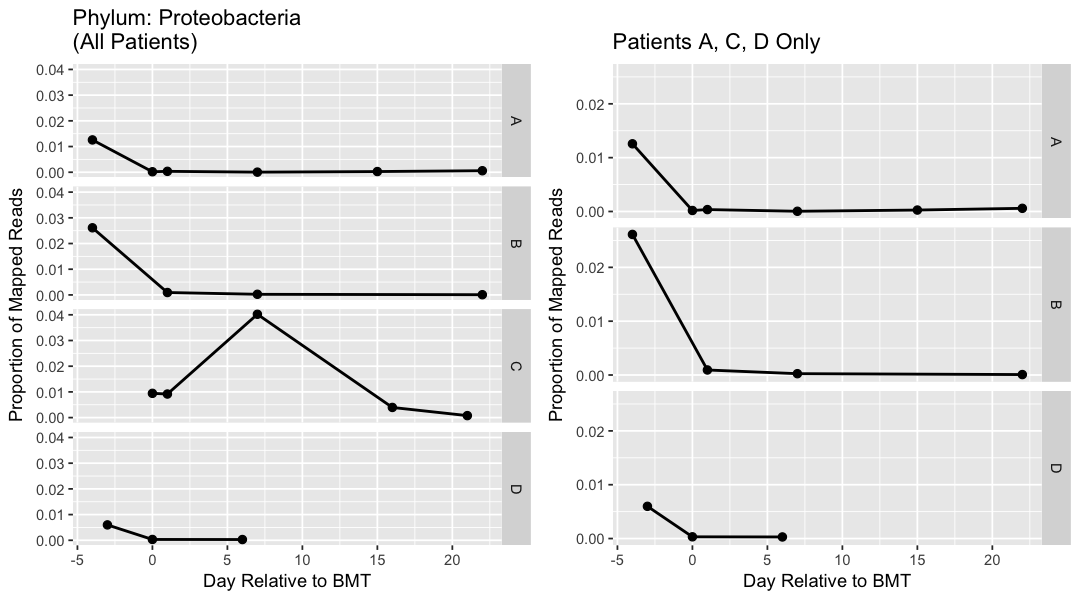

In [16]:
### GRAPH 9
# Relative Proteobacteria Phylum Reads over Time
# Hypothesized to DECREASE Relative to Controls
options(repr.plot.width  = 9, repr.plot.height = 5)
d1 <- c8 %>% filter(Phylum == "Proteobacteria", Rank == "phylum")
d2 <- c8 %>% filter(Phylum == "Proteobacteria", Rank == "phylum", !(Patient == "C"))
g10 <- ggplot(data = d1, mapping = aes(x = Day, y = Mapped.Relative)) +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  facet_grid(Patient~.) +
  geom_point(cex = 2) +
  geom_line(cex = .8) +
  ggtitle("Phylum: Proteobacteria\n(All Patients)")
g100 <- ggplot(data = d2, mapping = aes(x = Day, y = Mapped.Relative)) +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  facet_grid(Patient~.) +
  geom_point(cex = 2) +
  geom_line(cex = .8) +
  ggtitle("\nPatients A, C, D Only")
multiplot(g10, g100, cols = 2)

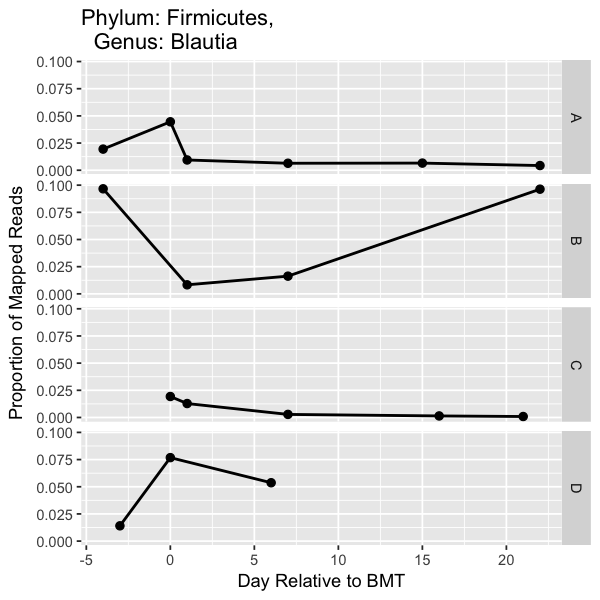

In [17]:
### GRAPH 10
# Relative Blautia Genus Reads over Time
options(repr.plot.width  = 5, repr.plot.height = 5)
d1 <- c8 %>% filter(Genus == "Blautia", Rank == "genus")
g10 <- ggplot(data = d1, mapping = aes(x = Day, y = Mapped.Relative)) +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  facet_grid(Patient~.) +
  geom_point(cex = 2) +
  geom_line(cex = .8) +
  ggtitle("Phylum: Firmicutes,\n  Genus: Blautia")
  #theme_classic()
g10

## Custom Shannon Diversity

In [18]:
# Modifying dataframe 
d <- c8
d$Patient <- as.factor(d$Patient)
# Create new dataframe to hold PHYLA diversity values
sh_df <- data.frame(Patient=character(), Day=character(), Phylum.Diversity=character())
# Calculate Shannon Diversity at Phylum Level, add to new dataframe
# Divide by Patient:
for (pt in levels(d$Patient) ) {
  df_pt <- filter(d, Patient == pt)
  # Divide by Day:
  for (dy in unique(df_pt$Day)) { 
    df_pt_dy <- filter(df_pt, Day == dy)
    mapped <- as.numeric(as.character(df_pt_dy$`Mapped Reads`[1]))
    virus_reads <- 0
    host_reads <- 0
    shannon <- 0
    if ("Uncultured phage crAssphage" %in% df_pt_dy$Species) {
      virus_reads <- as.numeric(as.character(filter(df_pt_dy, Species == "Uncultured phage crAssphage" )$Reads[1])) }
    if ("Host" %in% df_pt_dy$Type) {
      host_reads <- as.numeric(as.character(filter(df_pt_dy, Type == "Host" )$Reads[1])) }
    newReads <- mapped - virus_reads - host_reads
    df_pt_dy_phy <- filter(df_pt_dy, Rank == "phylum")
    # Divide by Phylum:
    for (phy in df_pt_dy_phy$Phylum) {    
      p <- as.numeric(as.character(df_pt_dy_phy[df_pt_dy_phy$Name == phy,13])) / newReads
      if (length(p) > 0 & p != 0) {shannon <- shannon - p * log(p)}
    }
    sh_df <- rbind(sh_df, data_frame(Patient = pt, Day = dy, Phylum.Diversity = shannon))
  }
}
# Add column from new dataframe to old dataframe
d2 <- inner_join(d, sh_df)

Joining, by = c("Patient", "Day")
Warning message in inner_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factor and character vector, coercing into character vector”

In [19]:
### GRAPH 11
# Shannon
options(repr.plot.width  = 9, repr.plot.height = 6)

c99 <- filter(d2, Rank == "superkingdom", Type == "Bacteria")
g11 <- ggplot(data = c99, mapping = aes(x = factor(Day), y = Phylum.Diversity)) +
  geom_bar(stat="identity") +
  facet_grid(Patient~.) +
  xlab("Day Relative to BMT") + ylab("Shannon Diversity") +
  ggtitle("Phylum Level Diversity") +
  theme(plot.title = element_text(hjust = 0.5)) # centers title

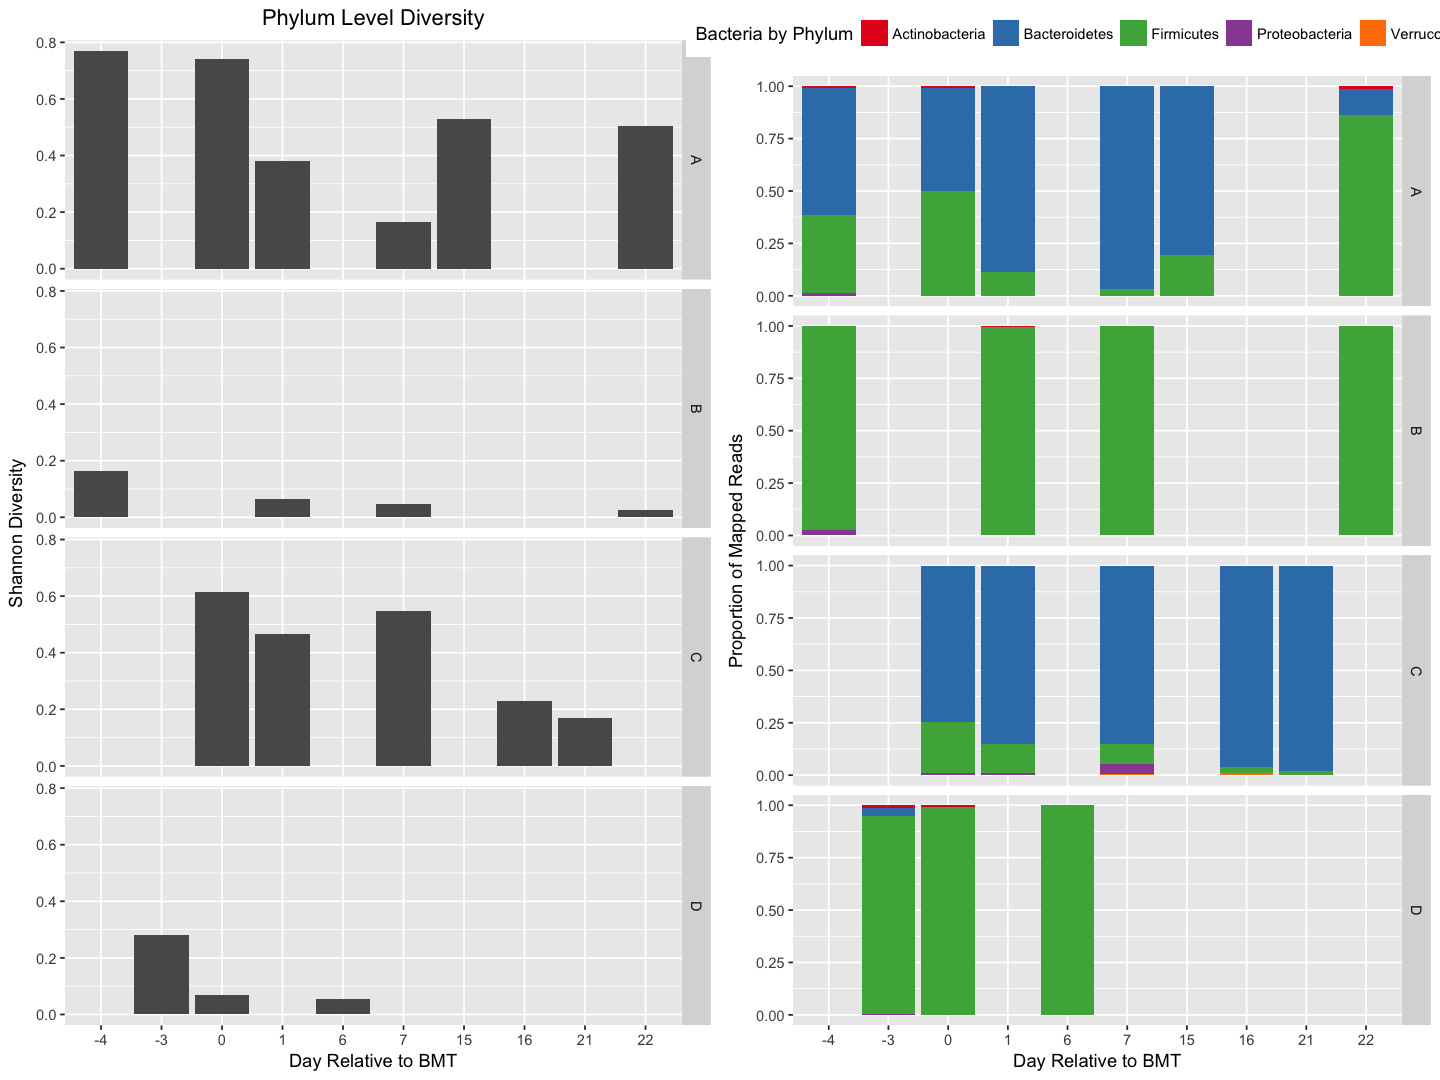

In [20]:
### GRAPH 12 // MODIFIED to remove non-bacteria
# Relative Phylum Reads over Time, ALL Samples
options(repr.plot.width  = 12, repr.plot.height = 9)
cc4 <- c8 %>% filter(Rank == "phylum",  Type == "Bacteria")
cc4 <- cc4 %>% filter(Mapped.Relative > 0.005)

g12 <- ggplot(data = cc4, mapping = aes(x = factor(Day), weight = Mapped.Relative)) +
  geom_bar(aes(fill = Name), position = "fill") +
  xlab("Day Relative to BMT") + ylab("Proportion of Mapped Reads") +
  facet_grid(Patient~.) +
  scale_fill_brewer(palette="Set1") +
  theme(legend.position="top") +
  guides(fill=guide_legend(title="Bacteria by Phylum"))

multiplot(g11, g12, cols = 2)

In [21]:
# Calculate GENERA Diversity 
# Create new dataframe to hold diversity values
sh_df2 <- data.frame(Patient=character(), Day=character(), Genus.Diversity=character())
# Calculate Shannon Diversity at Genera Level, add to new dataframe
# Divide by Patient:
for (pt in levels(d$Patient) ) {
  df_pt <- filter(d, Patient == pt)
  # Divide by Day:
  for (dy in unique(df_pt$Day)) { 
    df_pt_dy <- filter(df_pt, Day == dy)
    mapped <- as.numeric(as.character(df_pt_dy$`Mapped Reads`[1]))
    virus_reads <- 0
    host_reads <- 0
    shannon <- 0
    if ("Uncultured phage crAssphage" %in% df_pt_dy$Species) {
      virus_reads <- as.numeric(as.character(filter(df_pt_dy, Species == "Uncultured phage crAssphage" )$Reads[1])) }
    if ("Host" %in% df_pt_dy$Type) {
      host_reads <- as.numeric(as.character(filter(df_pt_dy, Type == "Host" )$Reads[1])) }
    newReads <- mapped - virus_reads - host_reads
    df_pt_dy_phy <- filter(df_pt_dy, Rank == "genus")
    # Divide by Genus:
    for (phy in df_pt_dy_phy$Genus) {    
      p <- as.numeric(as.character(df_pt_dy_phy[df_pt_dy_phy$Name == phy,13])) / newReads
      if (length(p) > 0 & p != 0) {shannon <- shannon - p * log(p)}
    }
    sh_df2 <- rbind(sh_df2, data_frame(Patient = pt, Day = dy, Genus.Diversity = shannon))
  }
}
# Add column from new dataframe to old dataframe
d3 <- inner_join(d2, sh_df2)

Joining, by = c("Patient", "Day")


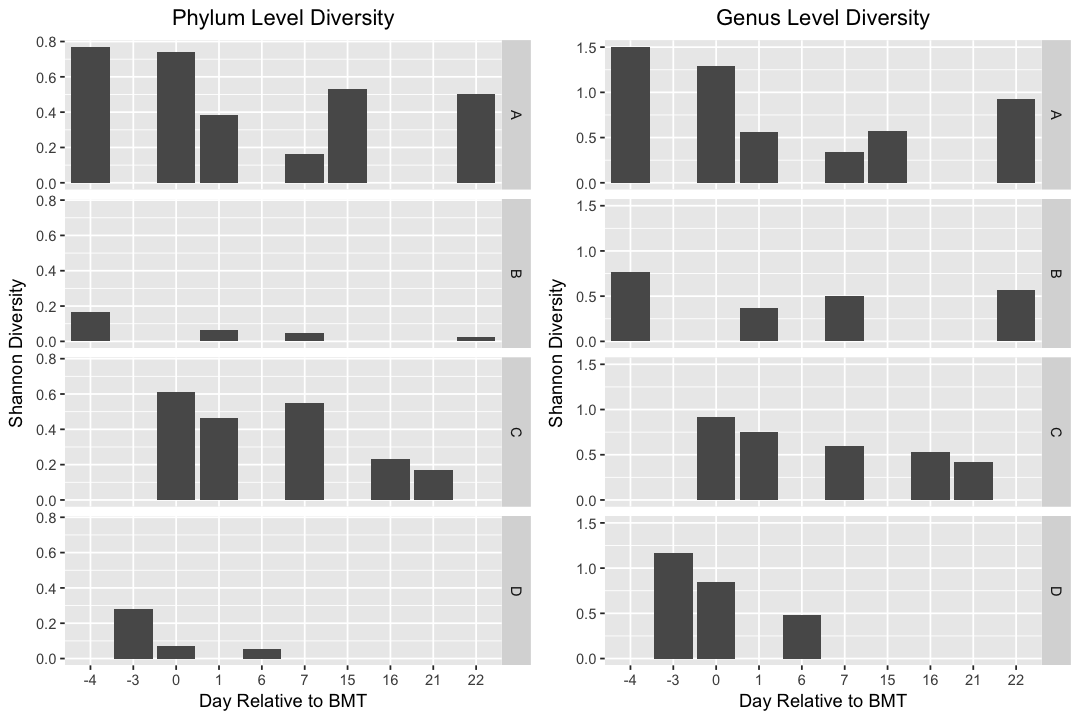

In [22]:
### GRAPH 13
options(repr.plot.width  = 9, repr.plot.height = 6)

c99 <- filter(d3, Rank == "superkingdom", Type == "Bacteria")
g13 <- ggplot(data = c99, mapping = aes(x = factor(Day), y = Genus.Diversity)) +
  geom_bar(stat="identity") +
  facet_grid(Patient~.) +
  xlab("Day Relative to BMT") + ylab("Shannon Diversity") +
  ggtitle("Genus Level Diversity") +
  theme(plot.title = element_text(hjust = 0.5)) # centers title
multiplot(g11, g13, cols = 2)

In [23]:
c100  <- gather(c99, "Diversity Type", "Diversity", 17:18)
head(c100)
dim(c100)

Name,Rank,Tax.ID,Type,Phylum,Class,Order,Family,Genus,Species,Patient,Day,Reads,Mapped Reads,Total Reads,Mapped.Relative,Diversity Type,Diversity
Bacteria,superkingdom,2,Bacteria,,,,,,,D,6,27423000,27903934,35729900,0.9827647,Phylum.Diversity,0.05450888
Bacteria,superkingdom,2,Bacteria,,,,,,,D,0,47514553,48522804,59045558,0.9792211,Phylum.Diversity,0.06855278
Bacteria,superkingdom,2,Bacteria,,,,,,,D,-3,21586587,21688384,32497902,0.9953064,Phylum.Diversity,0.28007110
Bacteria,superkingdom,2,Bacteria,,,,,,,C,21,11614547,19951395,23570224,0.5821421,Phylum.Diversity,0.16742782
Bacteria,superkingdom,2,Bacteria,,,,,,,C,16,58532100,62453858,86123740,0.9372055,Phylum.Diversity,0.22998337
Bacteria,superkingdom,2,Bacteria,,,,,,,C,7,7297498,8630781,11919048,0.8455200,Phylum.Diversity,0.54698789


[1] 36 18

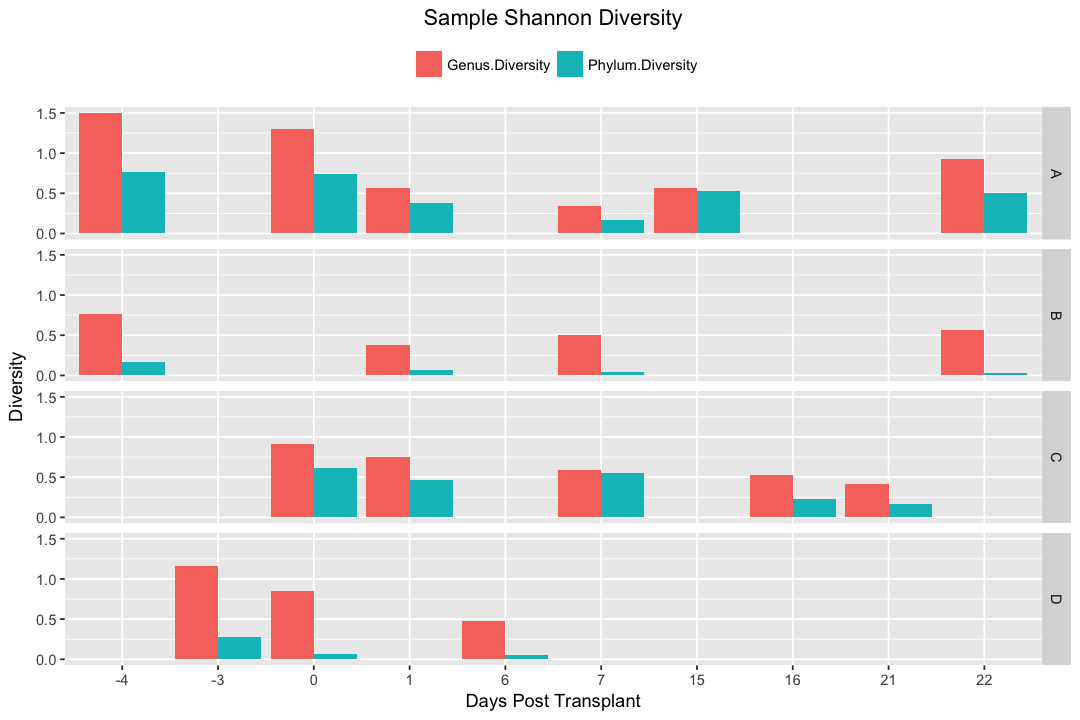

In [24]:
### Graph
ggplot(c100, aes(x = factor(Day), y = Diversity, fill = `Diversity Type`)) +
  facet_grid(Patient~.) +
  geom_bar(position="dodge", stat="identity") +
  ggtitle("Sample Shannon Diversity") +
  xlab("Days Post Transplant")+
  guides(fill=guide_legend(title=NULL))+
  theme(legend.position="top") +
  theme(plot.title = element_text(hjust = 0.5)) # centers title

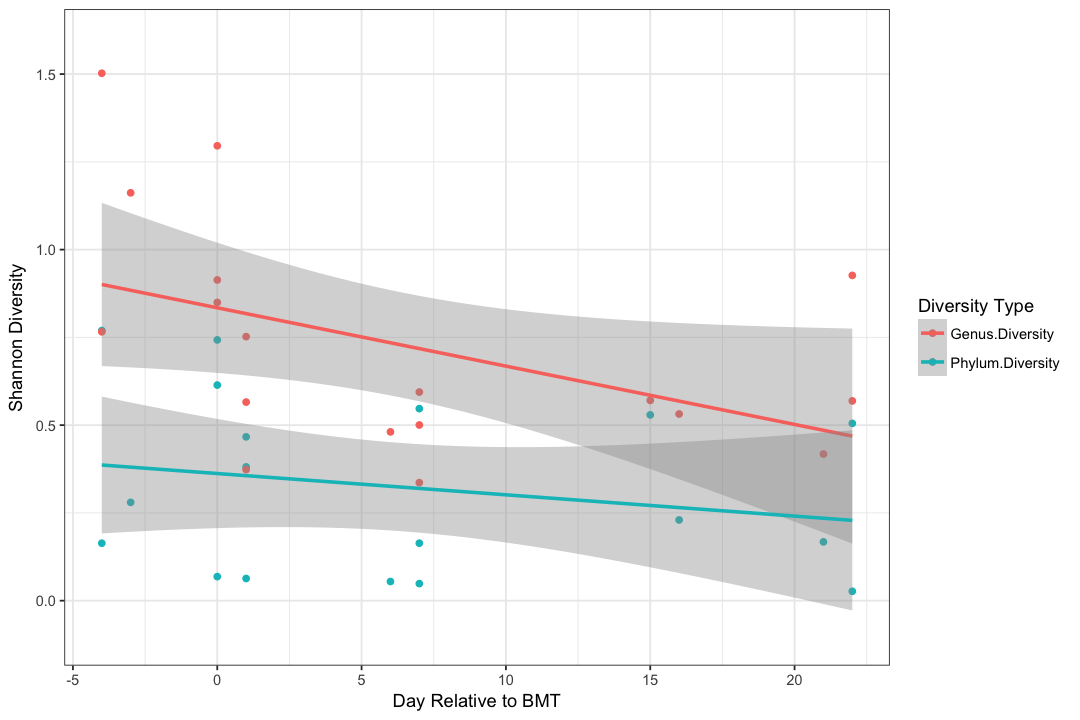

In [25]:
### GRAPH 14
g15 <- ggplot(data = c100, aes(x = Day, y = Diversity, color=`Diversity Type`)) +
  geom_point() +
  geom_smooth(method=lm) +
  xlab("Day Relative to BMT") + ylab("Shannon Diversity") +
  ylim(c(-.1, 1.6)) +
  theme_bw()
g15

### Shannon Diversity T-tests 

In [26]:
genus.diversity.lm <- lm(data = c99, Genus.Diversity ~ Day)
summary(genus.diversity.lm)


Call:
lm(formula = Genus.Diversity ~ Day, data = c99)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44448 -0.19690 -0.05121  0.09499  0.60167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.834296   0.087530   9.532 5.33e-08 ***
Day         -0.016614   0.008071  -2.058   0.0562 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3001 on 16 degrees of freedom
Multiple R-squared:  0.2094,	Adjusted R-squared:   0.16 
F-statistic: 4.237 on 1 and 16 DF,  p-value: 0.05621


#### Negative slope (-.016), almost significant (p = 0.056).

In [27]:
phylum.diversity.lm <- lm(data = c99, Phylum.Diversity ~ Day)
summary(phylum.diversity.lm)


Call:
lm(formula = Phylum.Diversity ~ Day, data = c99)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29362 -0.21756 -0.05129  0.24579  0.38299 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.362171   0.073363   4.937 0.000149 ***
Day         -0.006064   0.006765  -0.896 0.383353    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2515 on 16 degrees of freedom
Multiple R-squared:  0.04781,	Adjusted R-squared:  -0.0117 
F-statistic: 0.8034 on 1 and 16 DF,  p-value: 0.3834


####  Negative slope (-.006), but not a significant result (p = 0.383).

## Shannon Diversity with Vegan

In [ ]:
install.packages("vegan")

In [28]:
library(vegan)


The downloaded binary packages are in
	/var/folders/5m/xmsmglrs21vfbfhx2xpdg_dh0000gn/T//Rtmp4kCS6O/downloaded_packages


Loading required package: permute
Loading required package: lattice
This is vegan 2.4-1


In [29]:
# Reshape data
# Separate dataframes for genus and phylum
# Will merge later on.
t0 <- c8
t0 <- filter(t0, Rank == "genus", Reads > 100)
p0 <- filter(c8, Rank == "phylum", Reads > 100)
t1 <- t0[,-c(1:8,10,14:16)]
p1 <- p0[,-c(1:4,6:10,14:16)]
t2 <- spread(t1, Genus, Reads)
p2 <- spread(p1, Phylum, Reads)
t2[is.na(t2)] <- 0
p2[is.na(p2)] <- 0
t2.num <- t2[,-c(1:3)]
p2.num <- p2[,-c(1:3)]
t3 <- t2.num
p3 <- p2.num

# Append column of shannon diversities to dataframe
H <- diversity(t3) # Vegan diversity function
H2 <- diversity(p3)
t2$Diversity <- H
p2$Diversity <- H2
t2$`Diversity Type` <- rep("Vegan.Genus")
p2$`Diversity Type` <- rep("Vegan.Phylum")

In [30]:
# Trim Down Vegan Diversity data
t4 <- t2[,c(1, 2, dim(t2)[2] - 1, dim(t2)[2])]
p4 <- p2[,c(1, 2, dim(p2)[2] - 1, dim(p2)[2])]
head(t4)
head(p4)

# Stack Vegan Diversities
veg = rbind(t4,p4)

Patient,Day,Diversity,Diversity Type
A,-4,1.7130586,Vegan.Genus
A,0,1.4389528,Vegan.Genus
A,1,0.4962572,Vegan.Genus
A,7,0.1832724,Vegan.Genus
A,15,0.4641948,Vegan.Genus
A,22,2.7450955,Vegan.Genus


Patient,Day,Diversity,Diversity Type
A,-4,0.7264496,Vegan.Phylum
A,0,0.6995935,Vegan.Phylum
A,1,0.3701705,Vegan.Phylum
A,7,0.1544851,Vegan.Phylum
A,15,0.5122961,Vegan.Phylum
A,22,0.4126395,Vegan.Phylum


In [31]:
# Trim Down My Diversity Function Data
c101 <- c100[,c(11,12,17,18)]
head(c101)

Patient,Day,Diversity Type,Diversity
D,6,Phylum.Diversity,0.05450888
D,0,Phylum.Diversity,0.06855278
D,-3,Phylum.Diversity,0.28007110
C,21,Phylum.Diversity,0.16742782
C,16,Phylum.Diversity,0.22998337
C,7,Phylum.Diversity,0.54698789


In [32]:
# Stack the data
x <- rbind(c101, veg)
x$`Diversity Type` <- factor(x$`Diversity Type`, levels=c("Vegan.Genus", "Genus.Diversity",
                                                          "Vegan.Phylum", "Phylum.Diversity"))
dim(x)

[1] 72  4

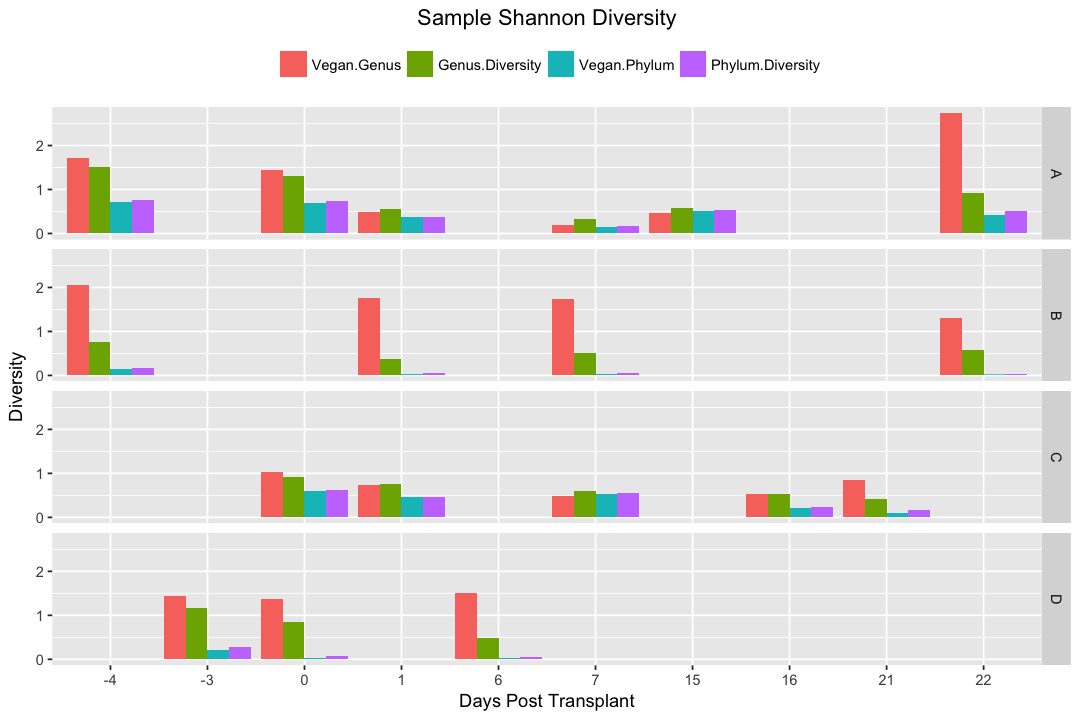

In [33]:
### Graph
ggplot(x, aes(x = factor(Day), y = Diversity, fill = `Diversity Type`)) +
  facet_grid(Patient~.) +
  geom_bar(position="dodge", stat="identity") +
  ggtitle("Sample Shannon Diversity") +
  xlab("Days Post Transplant")+
  guides(fill=guide_legend(title=NULL))+
  theme(legend.position="top") +
  theme(plot.title = element_text(hjust = 0.5)) # centers title

Why does the vegan package shannon diversity function yeild different results, especially at the genus level?
The answer lies in the fact that I used a different normalization factor when calculating p_i, the proportion of genus (or phylum) i in the sample. Vegan normalized by all the reads classified at the genus level whereas my function normalizes by the total mapped reads (minus reads mapped to host or viruses). Since almost all mapped reads are classified to at least the phylum level, the my calculated phylum diversity values are in close agreement with those from vegan. This is not true for genus diversity since sometimes as little as 20% of the mapped reads are classified at the genus. The question remains, however, as to why the vegan genus level diversity is sometimes lower (rather than always higher as expected) than my calculated genus diversity values. 

In [34]:
x <- rbind(c101, t3)
head(x, 30)
dim(x)

ERROR: Error in rbind(deparse.level, ...): numbers of columns of arguments do not match


### Genus Principle Componant Analysis

In [35]:
# Reformat dataframe
t0 <- c8
t0 <- filter(t0, Rank == "genus", Reads > "1000")

t1 <- t0[,-c(1:8,10,14:16)]
t1 <- unite(t1, Sample, Patient, Day, remove = FALSE)

t2 <- spread(t1, Genus, Reads)
t2[is.na(t2)] <- 0
t2.num <- t2[,-c(1:3)]

# Create PCA objects
pca <- prcomp(t2.num, center = TRUE, scale. = TRUE) 

pca_dat <- mutate(fortify(pca), Day=t2$Day, Patient=t2$Patient)
pca_dat$colors <- c(rep("darkblue", 6), rep("red", 4), rep("darkgreen", 5),
                                 rep("orange", 3))

summary(pca)

Importance of components:
                           PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     10.1972 9.0246 8.2207 7.2402 6.41321 5.68315 5.03683
Proportion of Variance  0.2109 0.1652 0.1371 0.1063 0.08343 0.06551 0.05146
Cumulative Proportion   0.2109 0.3761 0.5132 0.6195 0.70295 0.76847 0.81993
                           PC8     PC9   PC10    PC11    PC12   PC13    PC14
Standard deviation     3.94575 3.89640 3.3526 3.31368 3.06444 2.8948 2.54931
Proportion of Variance 0.03158 0.03079 0.0228 0.02227 0.01905 0.0170 0.01318
Cumulative Proportion  0.85151 0.88230 0.9051 0.92737 0.94642 0.9634 0.97660
                          PC15    PC16    PC17      PC18
Standard deviation     2.46362 1.73146 1.57093 2.883e-15
Proportion of Variance 0.01231 0.00608 0.00501 0.000e+00
Cumulative Proportion  0.98891 0.99499 1.00000 1.000e+00

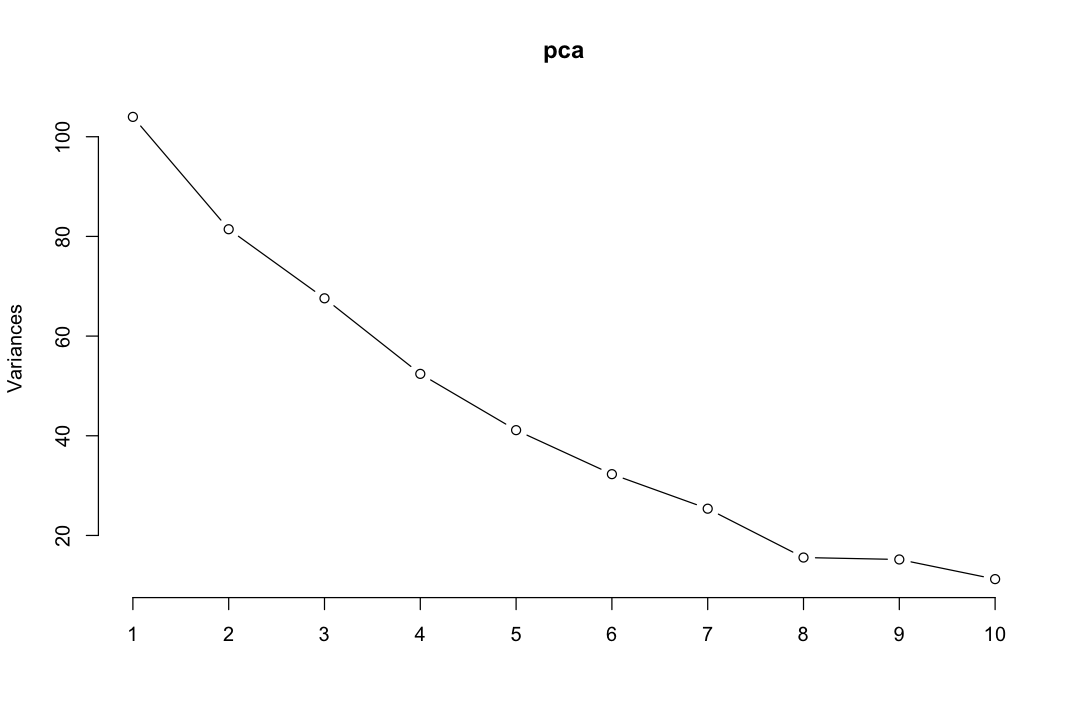

In [36]:
par(bg = "white")
plot(pca, type = "l")

In [37]:
# source: "http://www.davidzeleny.net/anadat-r/doku.php/en:numecolr:evplot"
evplot <- function(ev)
{
  # Broken stick model (MacArthur 1957)
  n <- length(ev)
  bsm <- data.frame(j=seq(1:n), p=0)
  bsm$p[1] <- 1/n
  for (i in 2:n) bsm$p[i] <- bsm$p[i-1] + (1/(n + 1 - i))
  bsm$p <- 100*bsm$p/n
  # Plot eigenvalues and % of variation for each axis
  op <- par(mfrow=c(2,1))
  barplot(ev, main="Eigenvalues", col="bisque", las=2)
  abline(h=mean(ev), col="red")
  legend("topright", "Average eigenvalue", lwd=1, col=2, bty="n")
  barplot(t(cbind(100*ev/sum(ev), bsm$p[n:1])), beside=TRUE, 
          main="% variation", col=c("bisque",2), las=2)
  legend("topright", c("% eigenvalue", "Broken stick model"), 
         pch=15, col=c("bisque",2), bty="n")
  par(op)
}

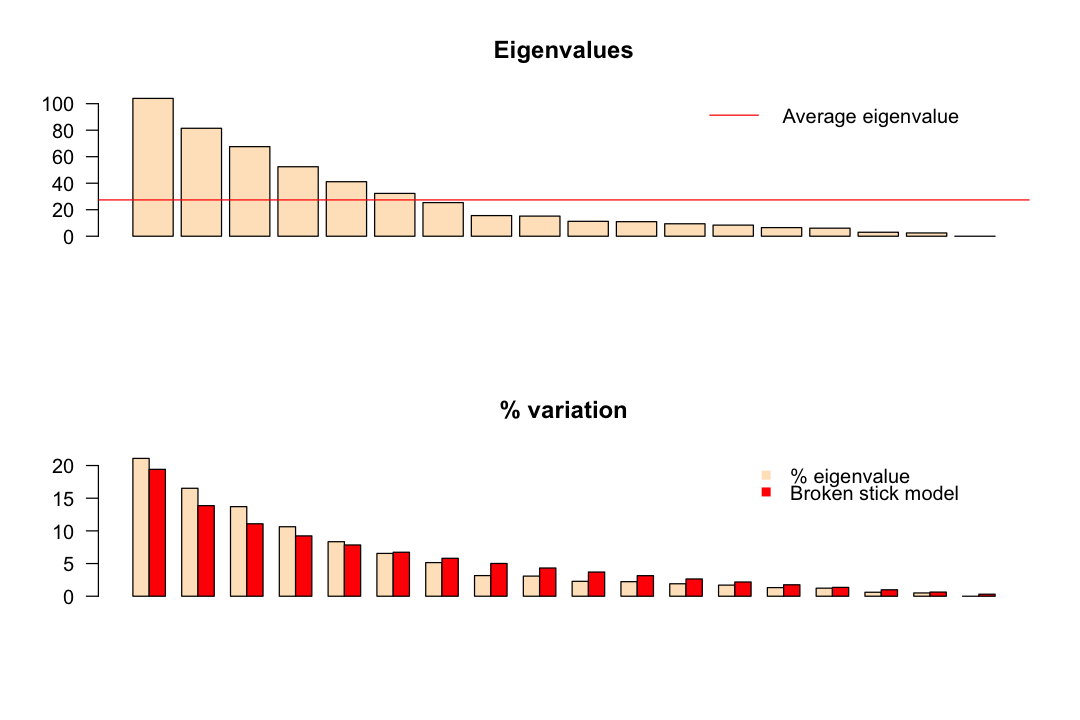

In [38]:
ev <- pca$sdev^2
par(bg = "white")
evplot(ev)

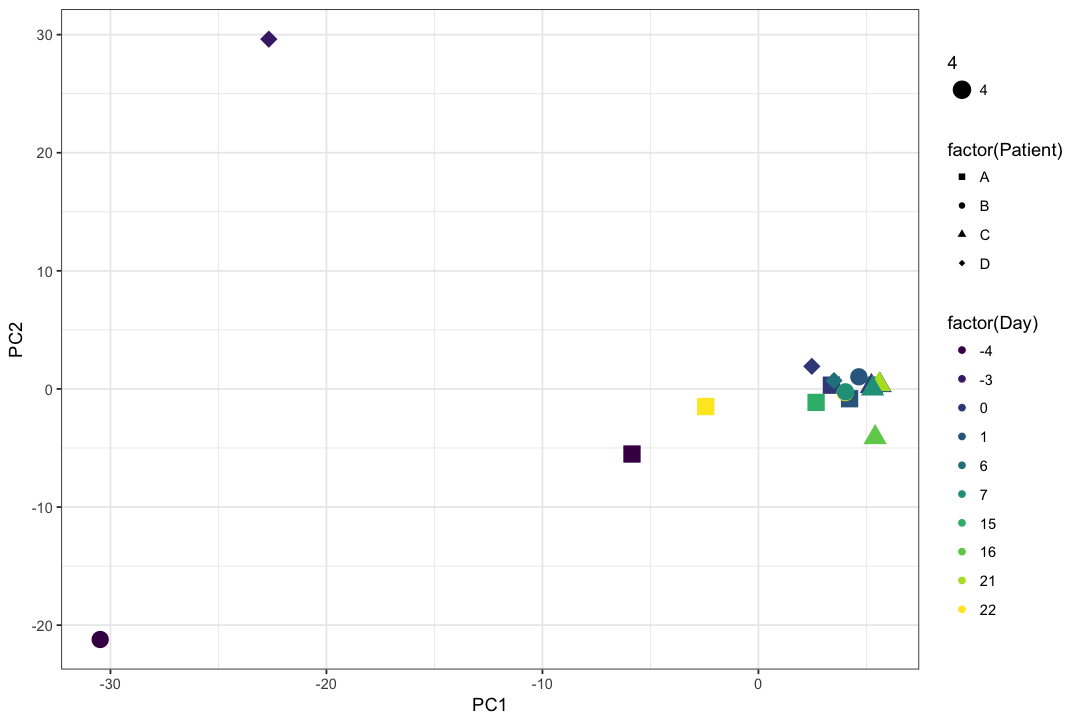

In [42]:
### GRAPH
ggplot(pca_dat, aes(x=PC1, y=PC2, shape = factor(Patient), size = 4)) +
  geom_point(aes(colour = factor(Day))) +
  scale_shape_manual(values=c(15:18))+
  scale_color_viridis(discrete=TRUE) +
  theme_bw()

In [43]:
head(pca_dat , 18)

Abiotrophia,Acetivibrio,Acetobacter,Acetobacterium,Achromatium,Achromobacter,Acidaminococcus,Acidiphilium,Acidocella,Acidovorax,⋯,PC12,PC13,PC14,PC15,PC16,PC17,PC18,Day,Patient,colors
-2.842171e-14,-1.314504e-13,2.300000e+01,3.000000e+00,1.776357e-15,8.000000e+00,1.600000e+01,5.600000e+01,3.000000e+00,3.100000e+01,⋯,0.216656837,-0.017162984,-0.356314253,0.03080503,0.021626631,-0.005984808,3.722717e-15,-4,A,darkblue
7.105427e-15,-2.380318e-13,3.000000e+00,1.332268e-15,6.439294e-15,5.000000e+00,9.000000e+00,-1.776357e-15,-3.552714e-15,2.700000e+01,⋯,-0.443979801,0.110614630,0.485782122,-0.16445453,0.219691995,0.036389917,2.383510e-15,0,A,darkblue
-2.842171e-14,0.000000e+00,1.500000e+01,-1.665335e-15,1.332268e-15,4.000000e+00,4.900000e+01,2.000000e+00,-5.329071e-15,6.900000e+01,⋯,2.057795743,0.044893631,-0.357472437,0.62375526,-0.203937821,0.245815152,2.602085e-15,1,A,darkblue
-4.263256e-14,-7.105427e-15,4.800000e+01,9.992007e-16,8.881784e-15,5.000000e+00,2.000000e+00,3.000000e+00,1.300000e+01,1.210000e+02,⋯,-4.547993935,1.918205692,1.278500388,1.53674991,-0.613432422,-0.103792740,-5.377643e-16,15,A,darkblue
-2.273737e-13,-2.131628e-13,3.800000e+01,6.000000e+00,3.552714e-15,2.500000e+01,9.000000e+00,1.200000e+01,1.199041e-14,1.640000e+02,⋯,0.490441860,-0.198904754,-0.161087780,-0.48186505,0.136302326,0.133186181,3.851086e-15,22,A,darkblue
1.207923e-13,4.520000e+02,2.000000e+00,-1.887379e-15,-7.771561e-15,-3.108624e-14,-7.105427e-15,1.065814e-14,-1.065814e-14,1.100000e+01,⋯,0.854125397,-3.108621991,5.345539187,-6.74636801,-1.537219361,-0.263134687,-1.200429e-15,7,A,darkblue
7.105427e-14,-1.172396e-13,1.300000e+01,1.121325e-14,-8.881784e-16,7.000000e+00,3.160000e+02,8.000000e+01,2.500000e+01,4.100000e+01,⋯,0.190830687,0.066423195,0.147743274,0.01940559,0.017581159,-0.070306673,2.390449e-15,-4,B,red
-3.552714e-13,-1.669775e-13,5.684342e-14,-1.665335e-15,4.440892e-15,-6.306067e-14,3.197442e-14,4.263256e-14,-1.998401e-14,-1.563194e-13,⋯,10.699411134,2.783087678,-1.062232943,1.01388868,-0.606441008,-0.100364808,-2.838008e-15,1,B,red
3.339551e-13,-1.669775e-13,7.105427e-15,-4.440892e-16,9.769963e-15,1.300000e+01,-1.598721e-13,-1.421085e-14,-1.110223e-14,-1.278977e-13,⋯,-2.054107168,0.008348215,-7.281239428,-4.84844820,-0.115660735,-0.120831939,8.569534e-16,22,B,red
9.947598e-14,-4.263256e-13,2.842171e-14,2.553513e-15,1.700000e+01,3.100000e+01,3.000000e+00,3.197442e-14,1.376677e-14,4.000000e+00,⋯,-0.997707427,1.343469730,4.480137878,2.46817052,-0.154946443,0.022261753,-9.298118e-16,7,B,red


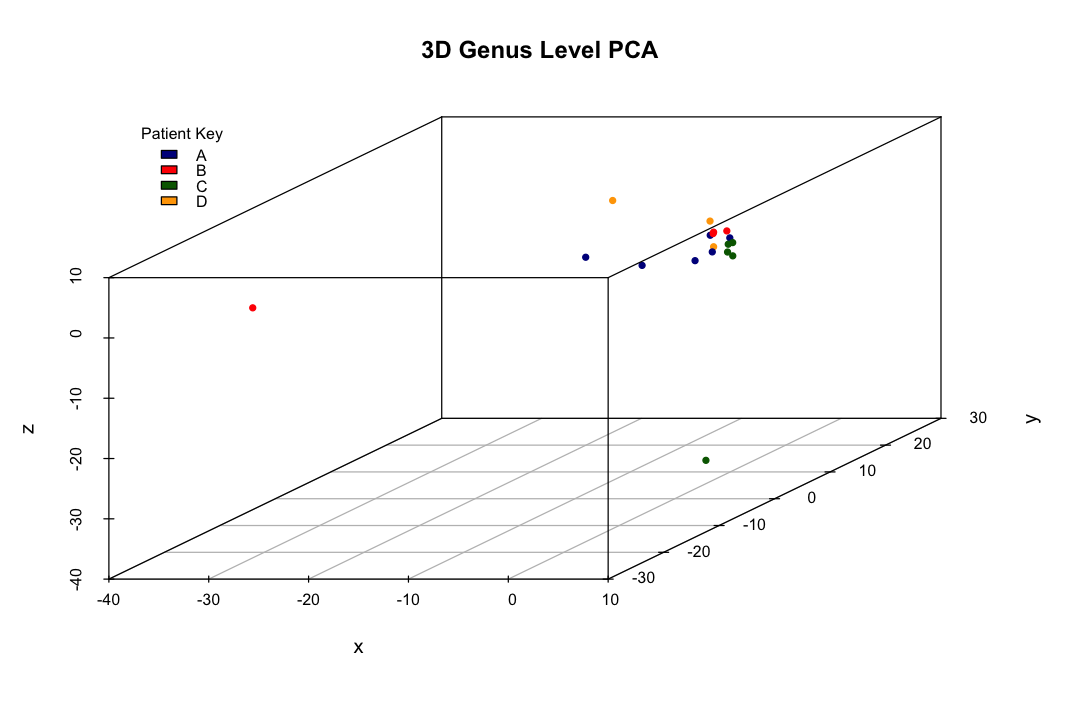

In [44]:
### 3d Plot
z <- pca_dat$PC3
x <- pca_dat$PC1
y <- pca_dat$PC2
par(bg = "white")
scatterplot3d(x, y, z, color = pca_dat$colors,
              main = "3D Genus Level PCA", pch = 20, bg = "white")
legend("topleft", inset=.05,      # location and inset
    bty="n", cex=.8,              # suppress legend box, shrink text 50%
    title="Patient Key",
    c("A", "B", "C", "D"), fill=c("darkblue", "red", "darkgreen", "orange"))

In [45]:
### 3d Rotating PCA Plot GIF. Does not display in Jupyter. Saves to Working Directory.
# pca3d(pca, group = pca_dat$Patient)
# makeMoviePCA(dir = getwd())

### Phylum PCA

In [46]:
# Reformat dataframe
t0 <- c8
t0 <- filter(t0, Rank == "genus", Reads > "1000")

t1 <- t0[,-c(1:8,10,14:16)]
t1 <- unite(t1, Sample, Patient, Day, remove = FALSE)
head(t1)
t2 <- spread(t1, Genus, Reads)
t2[is.na(t2)] <- 0
t2.num <- t2[,-c(1:3)]

# Create PCA objects
pca <- prcomp(t2.num, center = TRUE, scale. = TRUE) 

pca_dat <- mutate(fortify(pca), Day=t2$Day, Patient=t2$Patient)
pca_dat$colors <- c(rep("darkblue", 6), rep("red", 4), rep("darkgreen", 5),
                                 rep("orange", 3))

summary(pca)

Genus,Sample,Patient,Day,Reads
Bacteroides,D_6,D,6,19111
Blautia,D_6,D,6,1498302
Ruminococcus,D_6,D,6,1459920
Roseburia,D_6,D,6,12487
Clostridium,D_6,D,6,117184
Lachnoclostridium,D_6,D,6,327351


Importance of components:
                           PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     10.1972 9.0246 8.2207 7.2402 6.41321 5.68315 5.03683
Proportion of Variance  0.2109 0.1652 0.1371 0.1063 0.08343 0.06551 0.05146
Cumulative Proportion   0.2109 0.3761 0.5132 0.6195 0.70295 0.76847 0.81993
                           PC8     PC9   PC10    PC11    PC12   PC13    PC14
Standard deviation     3.94575 3.89640 3.3526 3.31368 3.06444 2.8948 2.54931
Proportion of Variance 0.03158 0.03079 0.0228 0.02227 0.01905 0.0170 0.01318
Cumulative Proportion  0.85151 0.88230 0.9051 0.92737 0.94642 0.9634 0.97660
                          PC15    PC16    PC17      PC18
Standard deviation     2.46362 1.73146 1.57093 2.883e-15
Proportion of Variance 0.01231 0.00608 0.00501 0.000e+00
Cumulative Proportion  0.98891 0.99499 1.00000 1.000e+00

In [47]:
# Reformat dataframe
r <- c8 %>% filter(Rank == "phylum", Reads > "1000")
r <- r[,-c(1:4,6:10,14:16)]

In [48]:
r2 <- spread(r, Phylum, Reads)
head(r2)

Patient,Day,Actinobacteria,Apicomplexa,Aquificae,Armatimonadetes,Ascomycota,Bacteroidetes,Basidiomycota,Candidate division WWE3,⋯,Fusobacteria,Marinimicrobia,Nitrospirae,Planctomycetes,Proteobacteria,Spirochaetes,Synergistetes,Tenericutes,Thermotogae,Verrucomicrobia
A,-4,274300,NA,NA,NA,48,20711042,30,NA,⋯,83,14,NA,5,433636,66,46,21,12,9176
A,0,249100,6,NA,NA,1871,15128230,522,NA,⋯,2735,NA,NA,3,5683,24,14,NA,6,10801
A,1,31599,NA,NA,NA,1235,28056324,44,NA,⋯,404,3,2,2,11279,29,19,2,7,36060
A,7,8527,NA,NA,NA,200,27500740,NA,NA,⋯,757,2,NA,NA,1159,6,2,NA,3,15892
A,15,47811,8,NA,5,25,21526515,37,NA,⋯,8,NA,2,NA,7692,40,19,2,2,61249
A,22,184518,75,NA,26,2218,1470053,360,NA,⋯,259,9,NA,11,14378,51,33,106,5,50864


In [49]:
r2[is.na(r2)] <- 0

In [50]:
r2.num <- r2[,-c(1:3)]

In [51]:
# Create PCA objects
pca <- prcomp(r2.num, center = TRUE, scale. = TRUE) 
pca_dat <- mutate(fortify(pca), Day=r2$Day, Patient=r2$Patient)
head(pca_dat)
pca_dat$colors <- c(rep("darkblue", 6), rep("red", 4), rep("darkgreen", 5),
                                 rep("orange", 3))
summary(pca)

Apicomplexa,Aquificae,Armatimonadetes,Ascomycota,Bacteroidetes,Basidiomycota,Candidate division WWE3,Candidatus Aminicenantes,Candidatus Atribacteria,Candidatus Beckwithbacteria,⋯,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,Day,Patient
3.197442e-14,9.992007e-16,1.287859e-14,48,20711042,3.000000e+01,-4.440892e-16,0.000000e+00,2.000000e+00,-9.714451e-17,⋯,0.89627290,-0.31047057,0.8293519,-0.41306999,0.30042554,-0.41374897,-0.3592078088,-4.458239e-16,-4,A
6.000000e+00,-8.881784e-16,5.329071e-15,1871,15128230,5.220000e+02,8.881784e-16,2.000000e+00,-8.881784e-16,6.938894e-17,⋯,1.02015435,-0.22998300,0.7512233,0.33886566,-0.01285763,-0.04633745,-0.0034573436,-1.804112e-16,0,A
-1.776357e-15,-2.775558e-16,7.549517e-15,1235,28056324,4.400000e+01,6.661338e-16,-5.329071e-15,-1.554312e-15,-1.804112e-16,⋯,-2.19165625,1.00413002,-0.6794635,-0.24488654,0.31584579,-0.03864499,-0.0009422272,4.102621e-16,1,A
3.197442e-14,2.775558e-16,1.776357e-15,200,27500740,-5.684342e-14,-4.440892e-16,-1.154632e-14,-2.442491e-15,-2.498002e-16,⋯,1.03090305,0.21089171,-0.6560232,-1.20100242,-1.09786776,0.51906632,0.1922856538,1.075529e-15,7,A
8.000000e+00,1.609823e-15,5.000000e+00,25,21526515,3.700000e+01,2.220446e-15,3.000000e+00,3.774758e-15,-1.526557e-16,⋯,-0.03342121,-0.11724603,0.1472059,-0.01030450,0.14674678,0.01420769,-0.0357398553,6.372940e-16,15,A
7.500000e+01,3.552714e-15,2.600000e+01,2218,1470053,3.600000e+02,-3.330669e-15,3.000000e+00,1.776357e-15,-4.857226e-16,⋯,-0.46130006,0.05696843,0.4676393,0.06104157,-0.28526787,0.19682935,0.0813850854,-9.939966e-16,22,A


Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     3.5770 2.5535 2.5180 2.1250 1.73173 1.53678 1.41562
Proportion of Variance 0.2908 0.1482 0.1441 0.1026 0.06816 0.05367 0.04555
Cumulative Proportion  0.2908 0.4390 0.5831 0.6857 0.75386 0.80754 0.85309
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     1.37694 1.03345 0.89592 0.82189 0.8124 0.74044 0.56616
Proportion of Variance 0.04309 0.02427 0.01824 0.01535 0.0150 0.01246 0.00729
Cumulative Proportion  0.89617 0.92045 0.93869 0.95404 0.9690 0.98150 0.98879
                          PC15   PC16    PC17      PC18
Standard deviation     0.45727 0.4196 0.32890 3.075e-16
Proportion of Variance 0.00475 0.0040 0.00246 0.000e+00
Cumulative Proportion  0.99354 0.9975 1.00000 1.000e+00

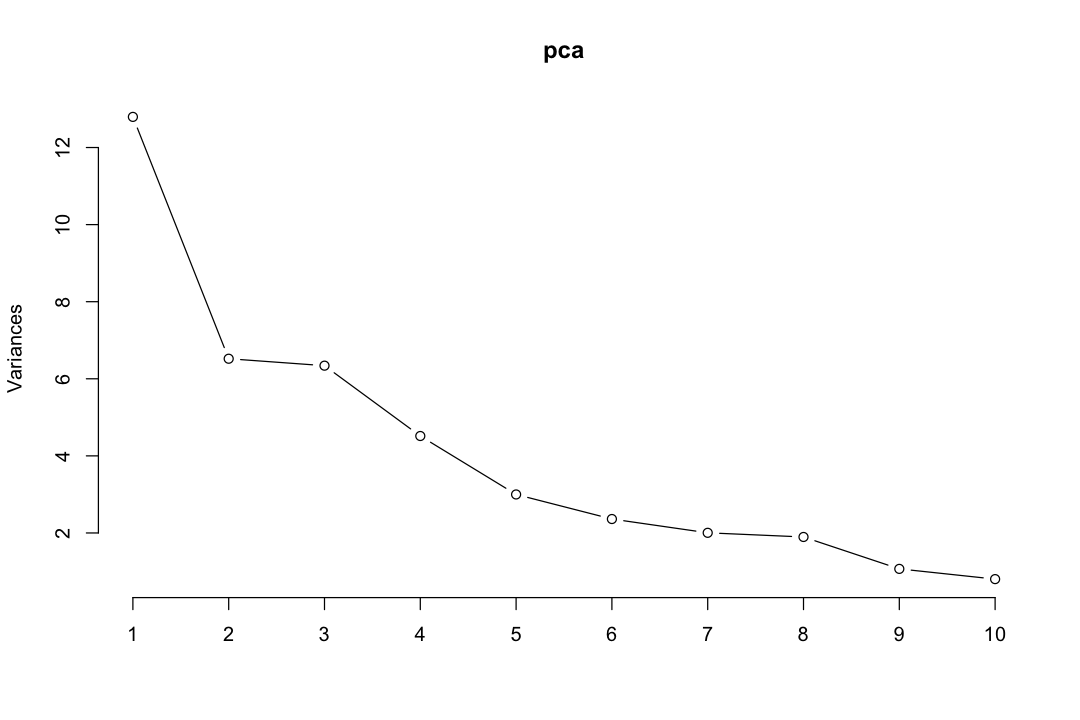

In [52]:
par(bg = "white")
plot(pca, type = "l")

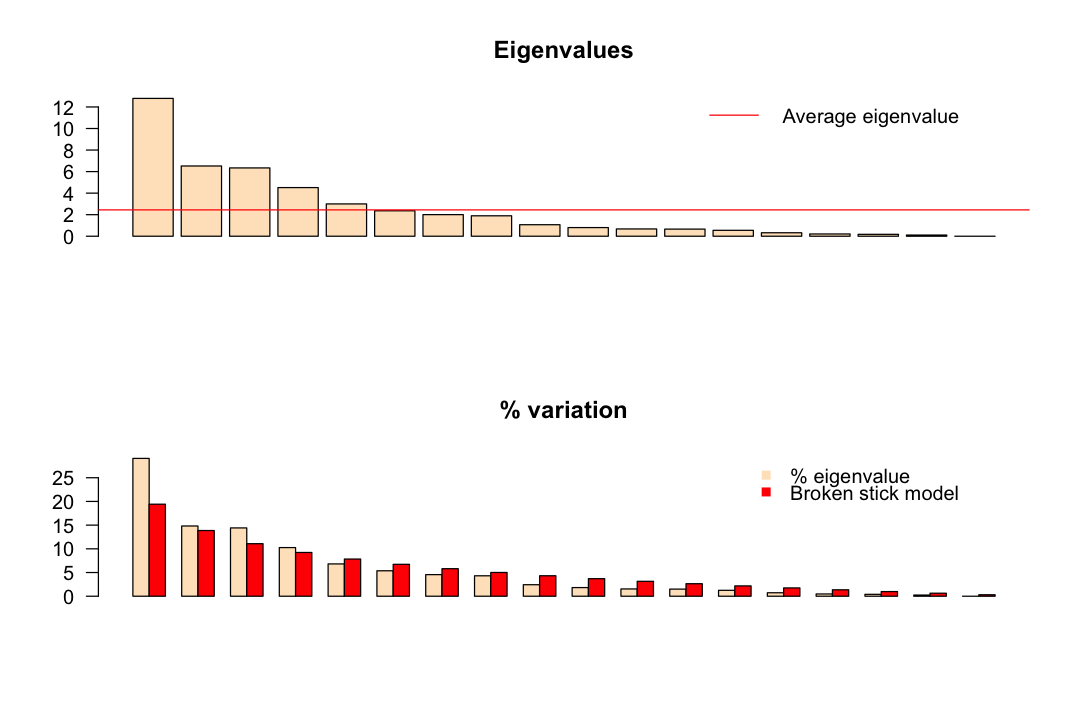

In [53]:
ev <- pca$sdev^2
par(bg = "white")
evplot(ev)

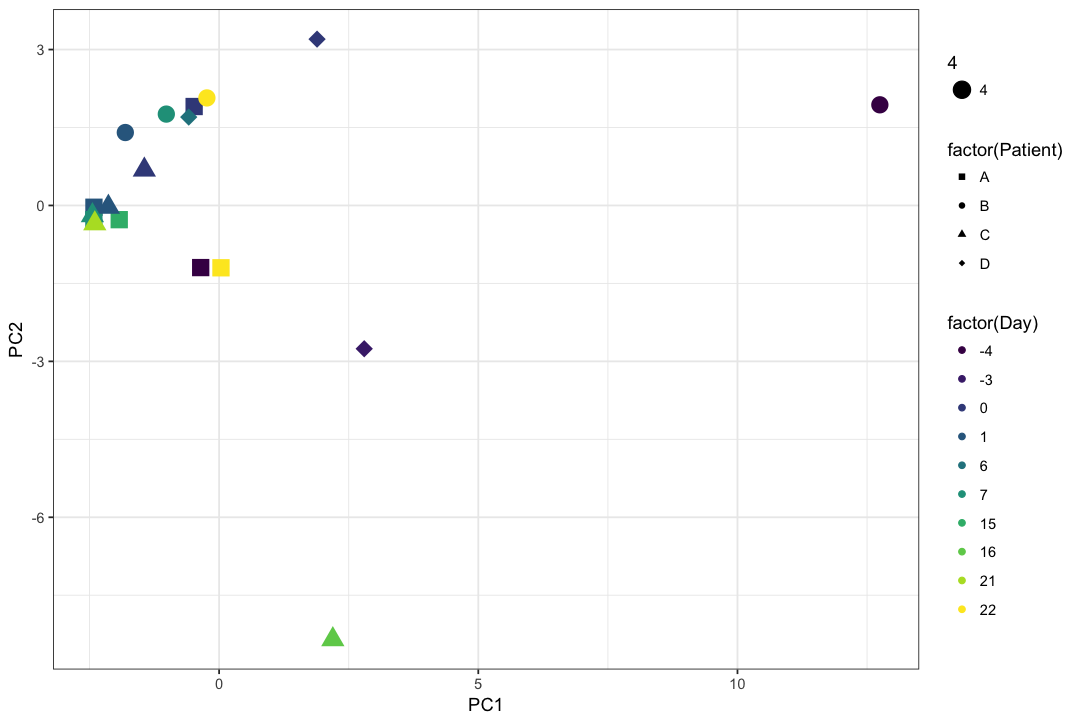

In [54]:
### GRAPH
ggplot(pca_dat, aes(x=PC1, y=PC2, shape = factor(Patient), size = 4)) +
  geom_point(aes(colour = factor(Day))) +
  scale_shape_manual(values=c(15:18))+
  scale_color_viridis(discrete=TRUE) +
  theme_bw()

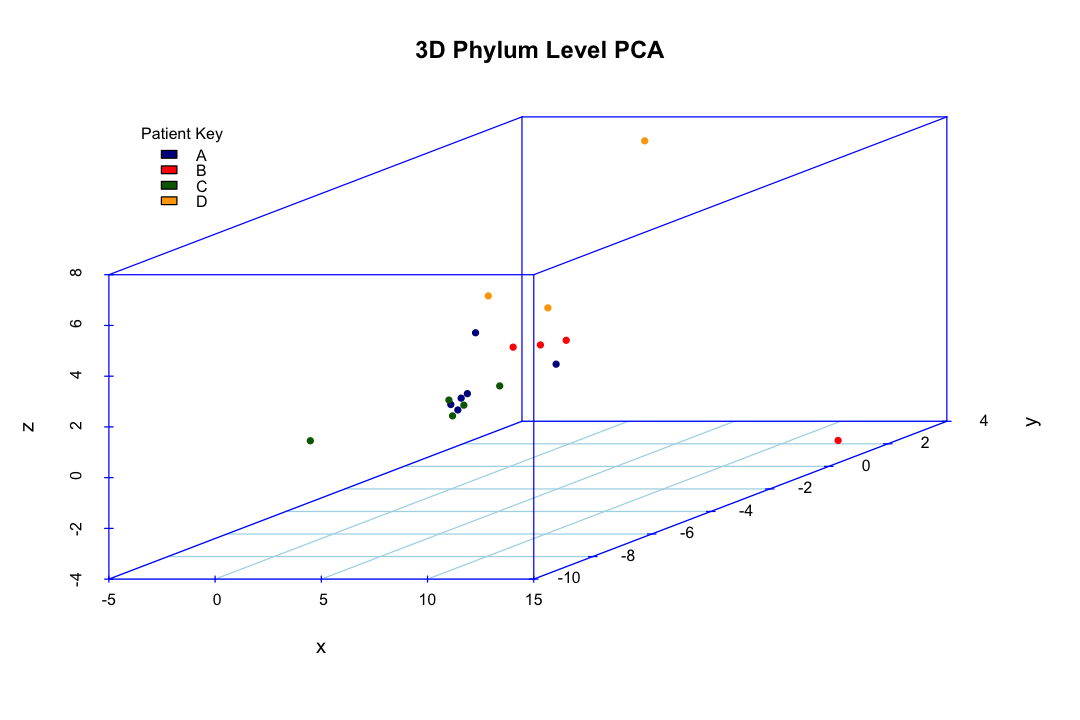

In [55]:
z <- pca_dat$PC3
x <- pca_dat$PC1
y <- pca_dat$PC2
par(bg = "white")
scatterplot3d(x, y, z, color = pca_dat$colors, col.axis = "blue",
col.grid = "lightblue", main = "3D Phylum Level PCA", pch = 20)
legend("topleft", inset=.05,      # location and inset
    bty="n", cex=.8,              # suppress legend box, shrink text 50%
    title="Patient Key",
    c("A", "B", "C", "D"), fill=c("darkblue", "red", "darkgreen", "orange"))